In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk import ngrams
from nltk import word_tokenize
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import PorterStemmer 
from sklearn import metrics


import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk import ngrams
from nltk import word_tokenize
from keras.preprocessing.text import Tokenizer
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import PorterStemmer 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
import re
from bs4 import BeautifulSoup
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup

Using TensorFlow backend.


In [2]:
# Reading the data set

df = pd.read_csv("ISEAR.csv",header=None)


In [3]:
df.head()

,0,1,2
0,joy,On days when I feel close to my partner and ot...,NaN
1,fear,Every time I imagine that someone I love or I ...,NaN
2,anger,When I had been obviously unjustly treated and...,NaN
3,sadness,When I think about the short time that we live...,NaN
4,disgust,At a gathering I found myself involuntarily si...,NaN


In [4]:
# Removing the null values from the data set and specifying the column names
col = [0,1]
new_df = df[col]
new_df = new_df[pd.notnull(df[1])]
new_df.columns = ['Emotion','Text']
new_df.head()


,Emotion,Text
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


In [5]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

In [6]:
new_df['Text'] = new_df['Text'].apply(clean_text)

In [7]:
df1=new_df.copy()

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
new_df.groupby('Emotion').Text.count().plot.bar(ylim=0)
plt.show()


<Figure size 1000x600 with 1 Axes>

In [9]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

In [10]:
'''X_train, X_test, Y_train, Y_test=train_test_split(new_df['Text'],new_df['Emotion'], test_size=.05,random_state=1)
'''

"X_train, X_test, Y_train, Y_test=train_test_split(new_df['Text'],new_df['Emotion'], test_size=.05,random_state=1)\n"

In [11]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(new_df['Text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9193 unique tokens.


In [12]:
X = tokenizer.texts_to_sequences(new_df['Text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (7516, 250)


In [13]:
Y = pd.get_dummies(new_df['Emotion']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (7516, 7)


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.05, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(7140, 250) (7140, 7)
(376, 250) (376, 7)


In [38]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.5))
model.add(LSTM(100, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(Y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.05,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Train on 6783 samples, validate on 357 samples
Epoch 1/10
6783/6783 [==============================] - 60s 9ms/step - loss: 1.9269 - acc: 0.2257 - val_loss: 1.8809 - val_acc: 0.3165
Epoch 2/10
6783/6783 [==============================] - 59s 9ms/step - loss: 1.7020 - acc: 0.3899 - val_loss: 1.4818 - val_acc: 0.5126
Epoch 3/10
6783/6783 [==============================] - 59s 9ms/step - loss: 1.3231 - acc: 0.5375 - val_loss: 1.2676 - val_acc: 0.5658
Epoch 4/10
6783/6783 [==============================] - 59s 9ms/step - loss: 1.0745 - acc: 0.6303 - val_loss: 1.1703 - val_acc: 0.6106
Epoch 5/10
6783/6783 [==============================] - 60s 9ms/step - loss: 0.9387 - acc: 0.6842 - val_loss: 1.1723 - val_acc: 0.5826
Epoch 6/10
6783/6783 [==============================] - 60s 9ms/step - loss: 0.8071 - acc: 0.7332 - val_loss: 1.1663 - val_acc: 0.6050
Epoch 7/10
6783/6783 [==============================] - 60s 9ms/step - loss: 0.7102 - acc: 0.7657 - val_loss: 1.1810 - val_acc: 0.6050
Epoch 8/

In [39]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

376/376 [==============================] - 0s 1ms/step
Test set
  Loss: 1.409
  Accuracy: 0.580


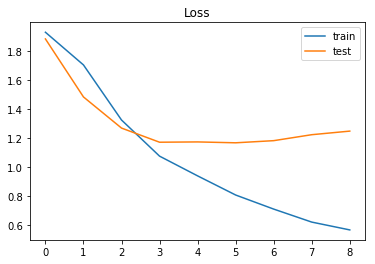

In [40]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

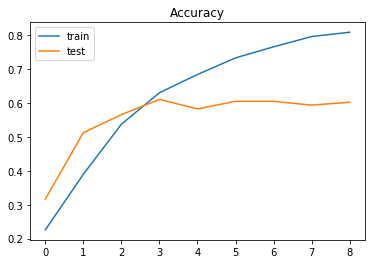

In [41]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

# LSTM and Convolutional Neural Network

In [42]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [54]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.5))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(Y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.05,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Train on 6783 samples, validate on 357 samples
Epoch 1/5
6783/6783 [==============================] - 29s 4ms/step - loss: 1.9399 - acc: 0.1681 - val_loss: 1.9209 - val_acc: 0.2269
Epoch 2/5
6783/6783 [==============================] - 25s 4ms/step - loss: 1.7704 - acc: 0.3040 - val_loss: 1.5146 - val_acc: 0.4482
Epoch 3/5
6783/6783 [==============================] - 26s 4ms/step - loss: 1.3552 - acc: 0.5008 - val_loss: 1.2430 - val_acc: 0.5406
Epoch 4/5
6783/6783 [==============================] - 25s 4ms/step - loss: 1.1196 - acc: 0.5875 - val_loss: 1.1868 - val_acc: 0.5574
Epoch 5/5
6783/6783 [==============================] - 26s 4ms/step - loss: 0.9510 - acc: 0.6653 - val_loss: 1.1932 - val_acc: 0.5630


In [55]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

376/376 [==============================] - 0s 766us/step
Test set
  Loss: 1.311
  Accuracy: 0.564


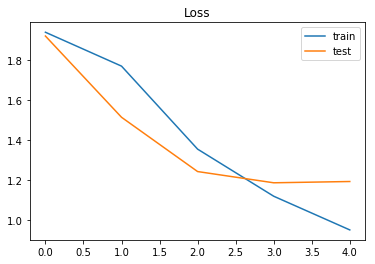

In [56]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

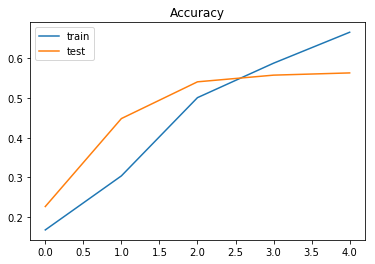

In [57]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [58]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train,Y_train, test_size = 0.05, random_state = 42)

In [63]:
from keras.layers import Input
from keras.layers import Bidirectional

In [65]:
from keras.layers import Embedding, Input
from keras import Model


sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = Embedding(9488, 512, trainable=False, name="test")(sequence_input)
l_lstm = Bidirectional(LSTM(100))(embedded_sequences)
preds = Dense(7, activation='softmax')(l_lstm)
model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

print("model fitting - Bidirectional LSTM")
model.summary()
model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
          nb_epoch=10, batch_size=50)

model fitting - Bidirectional LSTM
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 250)               0         
_________________________________________________________________
test (Embedding)             (None, 250, 512)          4857856   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200)               490400    
_________________________________________________________________
dense_11 (Dense)             (None, 7)                 1407      
Total params: 5,349,663
Trainable params: 491,807
Non-trainable params: 4,857,856
_________________________________________________________________


C:\Users\armug\Anaconda3_new\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 6783 samples, validate on 357 samples
Epoch 1/10
6783/6783 [==============================] - 167s 25ms/step - loss: 1.9225 - acc: 0.2034 - val_loss: 1.8828 - val_acc: 0.2997
Epoch 2/10
6783/6783 [==============================] - 172s 25ms/step - loss: 1.7916 - acc: 0.3361 - val_loss: 1.7284 - val_acc: 0.3277
Epoch 3/10
6783/6783 [==============================] - 174s 26ms/step - loss: 1.6186 - acc: 0.4150 - val_loss: 1.6179 - val_acc: 0.3978
Epoch 4/10
6783/6783 [==============================] - 174s 26ms/step - loss: 1.5072 - acc: 0.4581 - val_loss: 1.5395 - val_acc: 0.4482
Epoch 5/10
6783/6783 [==============================] - 172s 25ms/step - loss: 1.4154 - acc: 0.4862 - val_loss: 1.5118 - val_acc: 0.4398
Epoch 6/10
6783/6783 [==============================] - 170s 25ms/step - loss: 1.3605 - acc: 0.5113 - val_loss: 1.4707 - val_acc: 0.4482
Epoch 7/10
6783/6783 [==============================] - 171s 25ms/step - loss: 1.3041 - acc: 0.5341 - val_loss: 1.4204 - val_acc: 0

In [80]:
from keras import backend as K
from keras.layers import Layer,GRU


class AttLayer(Layer):
    def __init__(self, **kwargs):
        self.init = initializers.get('normal')
        #self.input_spec = [InputSpec(ndim=3)]
        super(AttLayer, self).__init__(** kwargs)

    def build(self, input_shape):
        assert len(input_shape)==3
        #self.W = self.init((input_shape[-1],1))
        self.W = self.init((input_shape[-1],))
        #self.input_spec = [InputSpec(shape=input_shape)]
        self.trainable_weights = [self.W]
        super(AttLayer, self).build(input_shape)  # be sure you call this somewhere!

    def call(self, x, mask=None):
        eij = K.tanh(K.dot(x, self.W))

        ai = K.exp(eij)
        weights = ai/K.sum(ai, axis=1).dimshuffle(0,'x')

        weighted_input = x*weights.dimshuffle(0,1,'x')
        return weighted_input.sum(axis=1)

    def get_output_shape_for(self, input_shape):
        return (input_shape[0], input_shape[-1])

In [81]:
import os

In [82]:

embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True)

In [83]:
from keras import initializers

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = Embedding(9488, 512, trainable=False, name="test")(sequence_input)
l_gru = Bidirectional(GRU(100, return_sequences=True))(embedded_sequences)
l_att = AttLayer()(l_gru)
preds = Dense(7, activation='softmax')(l_lstm)
model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

print("model fitting - Bidirectional LSTM")
model.summary()
model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
          nb_epoch=10, batch_size=50)

IndexError: pop index out of range

In [15]:
import os

# LSTM and Word Embedding

In [40]:
t = Tokenizer()
t.fit_on_texts(new_df['Text'])
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(new_df['Text'])
print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 500
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[104, 46, 36, 727, 5, 46, 2585, 120, 503, 36, 553, 13, 2168, 1658], [299, 4, 2169, 31, 90, 18, 553, 554, 438, 117, 109], [1165, 605, 300, 843, 4568], [201, 421, 4, 249, 3241, 4569, 124, 201, 422, 421, 4], [2170, 30, 3242, 216, 145, 57, 13, 1010, 1351, 637, 516, 4570], [125, 4571, 217, 2586, 727, 64, 271, 151, 695, 354, 4572, 4573], [46, 55, 844, 2587, 1659, 79, 204, 3243, 301, 46, 4574], [48, 218, 66, 14, 33, 84], [17, 4, 125, 1660, 109], [28, 3244, 42, 361, 728, 180], [373, 35, 264, 53, 2588, 169, 3, 1474, 504, 27, 326, 188, 3245, 257, 212, 327], [30, 4575, 3246, 4576, 1661], [891, 4577, 555, 48, 505, 403, 3247, 1352, 537, 204], [201, 169, 202, 423, 201, 156, 3248, 27, 4], [302, 112, 201, 80], [3, 729, 250, 31, 16, 4578, 97, 2589, 3, 3249, 290, 18, 191, 146, 1353, 696, 118], [3, 605, 258, 27, 3, 98], [955, 336, 1475, 4579, 362, 4580], [3, 4581, 31, 51, 67, 3, 35, 1662, 5, 2590, 79, 67, 148, 3250], [3, 801, 517, 183, 31, 326], [3, 1253, 801, 39, 2], [584, 66, 1091, 302], [1476, 1254, 

In [41]:
BASE_DIR = ''
GLOVE_DIR = os.path.join(BASE_DIR, '')


# first, build index mapping words in the embeddings set
# to their embedding vector

print('Indexing word vectors.')

embeddings_index = {}
with open('glove.6B.300d.txt', encoding="utf8") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, 'f', sep=' ')
        embeddings_index[word] = coefs

Indexing word vectors.


In [42]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in t.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [43]:
len(embedding_matrix)

9194

In [48]:
model = Sequential()
model.add(Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=250, trainable=False))
model.add(SpatialDropout1D(0.5))
model.add(LSTM(100, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(Y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 20
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.05,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Train on 6783 samples, validate on 357 samples
Epoch 1/20
6783/6783 [==============================] - 49s 7ms/step - loss: 1.8406 - acc: 0.2651 - val_loss: 1.6286 - val_acc: 0.3782
Epoch 2/20
6783/6783 [==============================] - 49s 7ms/step - loss: 1.6688 - acc: 0.3665 - val_loss: 1.4607 - val_acc: 0.4650
Epoch 3/20
6783/6783 [==============================] - 51s 7ms/step - loss: 1.5905 - acc: 0.4038 - val_loss: 1.3889 - val_acc: 0.4902
Epoch 4/20
6783/6783 [==============================] - 52s 8ms/step - loss: 1.5322 - acc: 0.4299 - val_loss: 1.3330 - val_acc: 0.5154
Epoch 5/20
6783/6783 [==============================] - 54s 8ms/step - loss: 1.5057 - acc: 0.4374 - val_loss: 1.2837 - val_acc: 0.5350
Epoch 6/20
6783/6783 [==============================] - 54s 8ms/step - loss: 1.4567 - acc: 0.4610 - val_loss: 1.2515 - val_acc: 0.5490
Epoch 7/20
6783/6783 [==============================] - 52s 8ms/step - loss: 1.4269 - acc: 0.4772 - val_loss: 1.2054 - val_acc: 0.5826
Epoch 8/

In [49]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

376/376 [==============================] - 1s 2ms/step
Test set
  Loss: 1.113
  Accuracy: 0.593


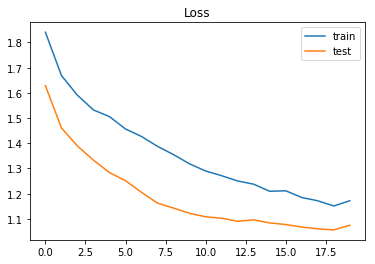

In [50]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

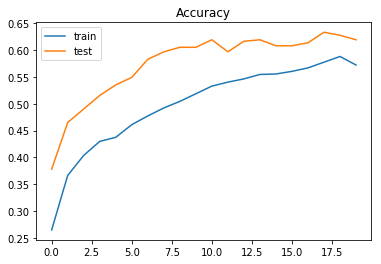

In [51]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [15]:
# Preprocessing the data set
# Performing Tokenization,removing new lines,punctuations
def getTokenizedList(input_df):
    tokenizedList=[]
    for i in range(0,len(input_df)):
        curText=input_df[1].iloc[i]
        curText=curText.replace('\n','')
        curTokenized=word_tokenize(curText)
        tokenizedList.append(curTokenized)
    print(tokenizedList)
    tokenziedListWithoutPunct=[] 
    punctList=list(string.punctuation)
    for i in range(0,len(tokenizedList)):
        curList=tokenizedList[i]
        newList=[] #list without stopwords
        for word in curList:
            if (word.lower() not in punctList):
                newList.append(word.lower())
        tokenziedListWithoutPunct.append(newList)

    #print(tokenziedListWithoutPunct)
#Stemming
    mystemmer=PorterStemmer()
    tokenziedStemmed=[]
    for i in range(0,len(tokenziedListWithoutPunct)):
        curList=tokenziedListWithoutPunct[i]
        newList=[] 
        for word in curList:
            newList.append(mystemmer.stem(word))
        tokenziedStemmed.append(newList)
    return tokenziedStemmed


In [16]:
# Preprocessing the sentence which we input to predict the emotion
def transformSentence(sent):
    s = []
    sent=sent.replace('\n','')
    sentTokenized=word_tokenize(sent)
    s.append(sentTokenized)
    sWithoutPunct = []
    punctList = list(string.punctuation)
    curSentList = s[0]
    newSentList = []
    for word in curSentList:
        if (word.lower() not in punctList):
            newSentList.append(word.lower())
    sWithoutPunct.append(newSentList)
    mystemmer = PorterStemmer()
    tokenziedStemmed = []
    for i in range(0,len(sWithoutPunct)):
        curList=sWithoutPunct[i]
        newList=[]
        for word in curList:
            newList.append(mystemmer.stem(word))
        tokenziedStemmed.append(newList)
    return tokenziedStemmed


In [17]:
def returnPhrase(inputList):
    return inputList

In [18]:
new_df['Text']=getTokenizedList(df)

[['On', 'days', 'when', 'I', 'feel', 'close', 'to', 'my', 'partner', 'and', 'other', 'friends', '.', 'When', 'I', 'feel', 'at', 'peace', 'with', 'myself', 'and', 'also', 'experience', 'a', 'close', 'contact', 'with', 'people', 'whom', 'I', 'regard', 'greatly', '.'], ['Every', 'time', 'I', 'imagine', 'that', 'someone', 'I', 'love', 'or', 'I', 'could', 'contact', 'a', 'serious', 'illness', ',', 'even', 'death', '.'], ['When', 'I', 'had', 'been', 'obviously', 'unjustly', 'treated', 'and', 'had', 'no', 'possibility', 'of', 'elucidating', 'this', '.'], ['When', 'I', 'think', 'about', 'the', 'short', 'time', 'that', 'we', 'live', 'and', 'relate', 'it', 'to', 'the', 'periods', 'of', 'my', 'life', 'when', 'I', 'think', 'that', 'I', 'did', 'not', 'use', 'this', 'short', 'time', '.'], ['At', 'a', 'gathering', 'I', 'found', 'myself', 'involuntarily', 'sitting', 'next', 'to', 'two', 'people', 'who', 'expressed', 'opinions', 'that', 'I', 'considered', 'very', 'low', 'and', 'discriminating', '.'], [

In [19]:
#splitting the data set into Training and Testing sets
X_train, X_test, Y_train, Y_test=train_test_split(new_df['Text'],new_df['Emotion'], test_size=.05,random_state=1)


In [20]:
Y_train[0]

'joy'

In [21]:
#Extracting features for Naive Bayes
myVectorizer=TfidfVectorizer(analyzer='word',tokenizer=returnPhrase,preprocessor=returnPhrase,token_pattern=None,ngram_range=(1,3))
myVectorizer.fit(X_train)
transformedTrain=myVectorizer.transform(X_train).toarray()
transformedTest=myVectorizer.transform(X_test).toarray()


In [22]:
# Training MultinomialNB and evaluating the performance
curAlpha=0.33 #smoothing factor in NB
NBClassifier=MultinomialNB(alpha=curAlpha)
NBClassifier.fit(transformedTrain,Y_train)
myPredTest=NBClassifier.predict(transformedTest)
print('Best Acc Naive Bayes')
#print(curAlpha)
print(np.sum(myPredTest==Y_test)/len(Y_test))

Best Acc Naive Bayes
0.6037234042553191


In [23]:

# Finding Precision,recall,and f1-score for Naive Bayes

print('Metrics Classification Report : Naive Bayes')
print(metrics.classification_report(Y_test, myPredTest))


Metrics Classification Report : Naive Bayes
              precision    recall  f1-score   support

       anger       0.69      0.48      0.56        61
     disgust       0.79      0.56      0.65        61
        fear       0.67      0.72      0.69        47
       guilt       0.42      0.66      0.51        44
         joy       0.71      0.60      0.65        48
     sadness       0.59      0.66      0.62        61
       shame       0.52      0.59      0.55        54

   micro avg       0.60      0.60      0.60       376
   macro avg       0.63      0.61      0.61       376
weighted avg       0.63      0.60      0.61       376



In [24]:
'''#Extracting the features for SVM
myVectorizer=TfidfVectorizer(analyzer='word',tokenizer=returnPhrase,preprocessor=returnPhrase,token_pattern=None,ngram_range=(1,3))
myVectorizer.fit(X_train)
transformedTrain=myVectorizer.transform(X_train).toarray()
transformedTest=myVectorizer.transform(X_test).toarray()

'''

"#Extracting the features for SVM\nmyVectorizer=TfidfVectorizer(analyzer='word',tokenizer=returnPhrase,preprocessor=returnPhrase,token_pattern=None,ngram_range=(1,3))\nmyVectorizer.fit(X_train)\ntransformedTrain=myVectorizer.transform(X_train).toarray()\ntransformedTest=myVectorizer.transform(X_test).toarray()\n\n"

In [25]:
# Training the SVM Model and Evaluating the performance
curC=2   #cost factor in SVM
SVMClassifier=svm.LinearSVC(C=curC)
SVMClassifier.fit(transformedTrain,Y_train)
myPredTest=SVMClassifier.predict(transformedTest)
print('Best Acc SVM')
#print(curC)
print(np.sum(myPredTest==Y_test)/len(Y_test))


Best Acc SVM
0.6356382978723404


In [27]:
Y_test

5391      anger
3473        joy
1165    sadness
7137    sadness
3053    disgust
6418      guilt
4287      anger
4184    sadness
7355      shame
5744        joy
802        fear
5311    disgust
7135       fear
1732      guilt
254       anger
2909      shame
6091        joy
3791      anger
3789        joy
4065    sadness
2326    sadness
2651       fear
2755        joy
6818      guilt
871         joy
3392      anger
2617    disgust
2591    disgust
1570    disgust
234     sadness
         ...   
1392       fear
4152      guilt
2989    sadness
2883        joy
6938    disgust
4665    disgust
4905      guilt
3801      shame
200        fear
6330       fear
3142      guilt
169       guilt
2768      guilt
4550       fear
219        fear
7253        joy
6898      shame
4239      anger
7362      shame
2704    sadness
5275    disgust
2735      guilt
2851      shame
2423       fear
2319    sadness
1537      guilt
4108    disgust
6200    sadness
6229    disgust
1322       fear
Name: Emotion, Length: 3

In [229]:
#Finding the precision,recall and f1-score for each emotion - SVM
print('Metrics Classification Report : SVM')
print(metrics.classification_report(Y_test, myPredTest))



Metrics Classification Report : SVM
              precision    recall  f1-score   support

       anger       0.64      0.52      0.58        61
     disgust       0.77      0.66      0.71        61
        fear       0.65      0.79      0.71        47
       guilt       0.48      0.57      0.52        44
         joy       0.75      0.62      0.68        48
     sadness       0.65      0.70      0.68        61
       shame       0.54      0.59      0.57        54

   micro avg       0.64      0.64      0.64       376
   macro avg       0.64      0.64      0.63       376
weighted avg       0.65      0.64      0.64       376



In [230]:
#To predict the emotion of a sentence using Naive Bayes
def predictSentNB(sent):
    sentPred = NBClassifier.predict(myVectorizer.transform(transformSentence(sent)).toarray())
    return sentPred


In [231]:
#To predict the emotion of a sentence using SVM
def predictSentSVM(sent):
    sentPred = SVMClassifier.predict(myVectorizer.transform(transformSentence(sent)).toarray())
    return sentPred


In [232]:
#Input sentence 
sent = "I saw a cockroach"



In [233]:
#Printing the predicted emotion
print("Navie bayes prediction")
print(predictSentNB(sent))
print("SVM prediction")
print(predictSentSVM(sent))



Navie bayes prediction
['disgust']
SVM prediction
['disgust']


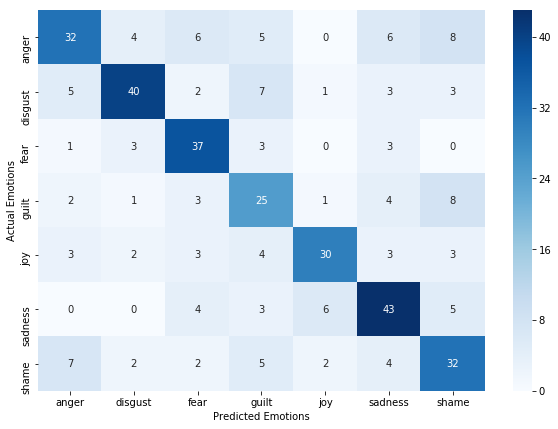

In [234]:
#printing the Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
labels = ['anger', 'disgust','fear','guilt','joy','sadness','shame']
cm = confusion_matrix(Y_test, myPredTest,labels)
#print(cm)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm, annot=True,fmt='d',
            xticklabels=labels, yticklabels=labels,cmap='Blues')
plt.ylabel('Actual Emotions')
plt.xlabel('Predicted Emotions')
plt.show()



In [235]:
text='lets go for dinner'
print(text,predictSentSVM(text))
text='i miss my granny'
print(text,predictSentSVM(text))
text='dont you dare talk to me like that'
print(text,predictSentSVM(text))
text='get the hell out of here'
print(text,predictSentSVM(text))
text='I think i saw a ghost'
print(text,predictSentSVM(text))
text='i feel bad for him'
print(text,predictSentSVM(text))
text='i will not be late for the meeting again'
print(text,predictSentSVM(text))
text='she broke my phone'
print(text,predictSentSVM(text))
text='you should have told me'
print(text,predictSentSVM(text))
text='i am moving to a new apartment'
print(text,predictSentSVM(text))

lets go for dinner ['guilt']
i miss my granny ['sadness']
dont you dare talk to me like that ['joy']
get the hell out of here ['shame']
I think i saw a ghost ['fear']
i feel bad for him ['guilt']
i will not be late for the meeting again ['guilt']
she broke my phone ['anger']
you should have told me ['guilt']
i am moving to a new apartment ['joy']


In [135]:
text='i have a test tomorrow'
print(text,predictSentNB(text))

i have a test tomorrow ['joy']


In [136]:
text='why you have to leave now'
print(text,predictSentSVM(text))

why you have to leave now ['sadness']


In [26]:
def make_examples(df: pd.DataFrame):
    for _, row in tqdm(df.iterrows()):
        example = data.Example.fromdict(row)
        yield example

In [27]:
t_text=make_examples(new_df)

In [28]:
t_text.shape

AttributeError: 'generator' object has no attribute 'shape'

In [99]:
import torchtext
from torchtext import data
import spacy

# tokenizer function using spacy
nlp = spacy.load('en',disable=['parser', 'tagger', 'ner'])
def tokenizer(s): 
    return [w.text.lower() for w in nlp(tweet_clean(s))]

def tweet_clean(text):
    text = re.sub(r'[^A-Za-z0-9]+', ' ', text) # remove non alphanumeric character
    text = re.sub(r'https?:/\/\S+', ' ', text) # remove links
    return text.strip()



In [100]:
import torch

In [101]:
# define the columns that we want to process and how to process
txt_field = data.Field(sequential=True, 
                       tokenize='spacy', 
                       include_lengths=True, 
                       use_vocab=True)
label_field = data.Field(sequential=False, 
                         use_vocab=False, 
                         pad_token=None, 
                         unk_token=None)

In [102]:
TEXT = data.Field(tokenize = 'spacy', include_lengths = True)
LABEL = data.LabelField(dtype = torch.float)

In [103]:
train_val_fields = [
    ('ItemID', None), # we dont need this, so no processing
    ('Sentiment', LABEL), # process it as label
    ('SentimentSource', None), # we dont need this, so no processing
    ('SentimentText', TEXT) # process it as text
]

In [104]:
trainds, valds = data.TabularDataset.splits(path='.', 
                                            format='csv', 
                                            train='ISEAR.csv', 
                                            fields=train_val_fields, 
                                            skip_header=True)

ValueError: not enough values to unpack (expected 2, got 1)

In [43]:
new_df.columns

Index(['Emotion', 'Text'], dtype='object')

In [38]:
import pandas as pd
from torchtext import data
from tqdm import tqdm
import torch

In [105]:
TEXT = data.Field(sequential=True,tokenize = 'spacy', lower=True, include_lengths=True)
LABEL = data.Field(sequential=False,tokenize = 'spacy', lower=True)
train_data = data.TabularDataset(path='./data/train.csv', 
                    format='csv', 
                    fields=[("Emotion",LABEL),
                            ("Text",TEXT)],  
                    skip_header=True)
test_data = data.TabularDataset(path='./data/test.csv', 
                    format='csv', 
                    fields=[("Emotion",LABEL),
                            ("Text",TEXT)],  
                    skip_header=True)
valid_data = data.TabularDataset(path='./data/validation.csv', 
                    format='csv', 
                    fields=[("Emotion",LABEL),
                            ("Text",TEXT)],  
                    skip_header=True)

In [126]:
vars(test_data.examples[1])

{'Emotion': 'anger',
 'Text': ['when',
  'i',
  'had',
  'been',
  'obviously',
  'unjustly',
  'treated',
  'and',
  'had',
  'no',
  'possibility',
  ' \n',
  'of',
  'elucidating',
  'this',
  '.']}

In [128]:
MAX_VOCAB_SIZE = 10_000

TEXT.build_vocab(train_data, 
                 max_size = MAX_VOCAB_SIZE, 
                 vectors = "glove.6B.100d", 
                 unk_init = torch.Tensor.normal_)

LABEL.build_vocab(train_data)

In [129]:
BATCH_SIZE = 7

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train_data, valid_data, test_data), 
    batch_size = BATCH_SIZE,
    sort_within_batch = True,
    device = device)

In [130]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, 
                 bidirectional, dropout, pad_idx):
        
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx = pad_idx)
        
        self.rnn = nn.LSTM(embedding_dim, 
                           hidden_dim, 
                           num_layers=n_layers, 
                           bidirectional=bidirectional, 
                           dropout=dropout)
        
        self.fc = nn.Linear(hidden_dim * 2, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text, text_lengths):
        
        #text = [sent len, batch size]
        
        embedded = self.dropout(self.embedding(text))
        
        #embedded = [sent len, batch size, emb dim]
        
        #pack sequence
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths)
        
        packed_output, (hidden, cell) = self.rnn(packed_embedded)
        
        #unpack sequence
        output, output_lengths = nn.utils.rnn.pad_packed_sequence(packed_output)

        #output = [sent len, batch size, hid dim * num directions]
        #output over padding tokens are zero tensors
        
        #hidden = [num layers * num directions, batch size, hid dim]
        #cell = [num layers * num directions, batch size, hid dim]
        
        #concat the final forward (hidden[-2,:,:]) and backward (hidden[-1,:,:]) hidden layers
        #and apply dropout
        
        hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
                
        #hidden = [batch size, hid dim * num directions]
            
        return self.fc(hidden.squeeze(0))

In [131]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTPUT_DIM = 1
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.5
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]

model = RNN(INPUT_DIM, 
            EMBEDDING_DIM, 
            HIDDEN_DIM, 
            OUTPUT_DIM, 
            N_LAYERS, 
            BIDIRECTIONAL, 
            DROPOUT, 
            PAD_IDX)

In [132]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 3,141,957 trainable parameters


In [133]:
pretrained_embeddings = TEXT.vocab.vectors

print(pretrained_embeddings.shape)

torch.Size([8313, 100])


In [134]:
model.embedding.weight.data.copy_(pretrained_embeddings)

tensor([[ 0.4931,  0.6336,  1.6496,  ..., -0.2726,  0.8300,  0.6988],
        [-0.1051,  0.4614,  0.7393,  ...,  0.3649,  0.0618,  0.1881],
        [-0.3398,  0.2094,  0.4635,  ..., -0.2339,  0.4730, -0.0288],
        ...,
        [-0.1509,  0.2089,  0.7544,  ..., -0.2359,  0.4850,  0.0263],
        [ 0.8045,  0.7451,  0.8545,  ...,  0.2799, -0.1860, -0.6946],
        [-0.2511,  0.5397, -0.9200,  ..., -2.0434,  0.7691,  1.1107]])

In [135]:
UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

print(model.embedding.weight.data)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.3398,  0.2094,  0.4635,  ..., -0.2339,  0.4730, -0.0288],
        ...,
        [-0.1509,  0.2089,  0.7544,  ..., -0.2359,  0.4850,  0.0263],
        [ 0.8045,  0.7451,  0.8545,  ...,  0.2799, -0.1860, -0.6946],
        [-0.2511,  0.5397, -0.9200,  ..., -2.0434,  0.7691,  1.1107]])


In [136]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())

In [137]:
criterion = nn.BCEWithLogitsLoss()

model = model.to(device)
criterion = criterion.to(device)

In [138]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc

In [139]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
        
        text, text_lengths = batch.text
        
        predictions = model(text, text_lengths).squeeze(1)
        
        loss = criterion(predictions, batch.label)
        
        acc = binary_accuracy(predictions, batch.label)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [140]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for batch in iterator:

            text, text_lengths = batch.text
            
            predictions = model(text, text_lengths).squeeze(1)
            
            loss = criterion(predictions, batch.label)
            
            acc = binary_accuracy(predictions, batch.label)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [141]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [142]:
N_EPOCHS = 5

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()
    
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

TypeError: '<' not supported between instances of 'Example' and 'Example'

In [122]:
model.load_state_dict(torch.load('tut2-model.pt'))

test_loss, test_acc = evaluate(model, test_iterator, criterion)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

FileNotFoundError: [Errno 2] No such file or directory: 'tut2-model.pt'

In [123]:
import spacy
nlp = spacy.load('en')

def predict_sentiment(model, sentence):
    model.eval()
    tokenized = [tok.text for tok in nlp.tokenizer(sentence)]
    indexed = [TEXT.vocab.stoi[t] for t in tokenized]
    length = [len(indexed)]
    tensor = torch.LongTensor(indexed).to(device)
    tensor = tensor.unsqueeze(1)
    length_tensor = torch.LongTensor(length)
    prediction = torch.sigmoid(model(tensor, length_tensor))
    return prediction.item()

In [124]:
predict_sentiment(model, "This film is terrible")

0.510802149772644

# LSTM

In [237]:
df=new_df.copy()

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

In [30]:
X = df.Text
y = df.Emotion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state = 42)

In [31]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.05, random_state = 42)

In [32]:
0.049

0.049

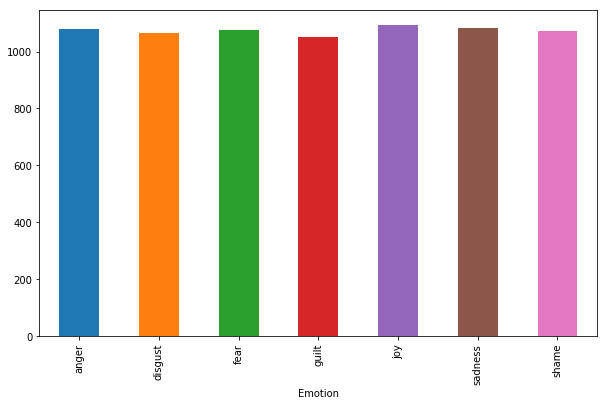

In [33]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
df.groupby('Emotion').Text.count().plot.bar(ylim=0)
plt.show()


In [36]:

def print_plot(index):
    example = df[df.index == index][['Text', 'Emotion']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Emotion:', example[1])

print_plot(10)

print_plot(100)

recently thought hard work takes study one wants try something else read theoretical book english understand
Emotion: sadness
day told accepted student economics
Emotion: joy


In [187]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each sentence.
MAX_SEQUENCE_LENGTH = 300
# This is fixed.
EMBEDDING_DIM = 300


In [188]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(new_df['Text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 6699 unique tokens.


In [189]:

X = tokenizer.texts_to_sequences(new_df['Text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Y = pd.get_dummies(new_df['Emotion']).values
print('Shape of label tensor:', Y.shape)

Shape of data tensor: (7516, 300)
Shape of label tensor: (7516, 7)


In [190]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.05, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(7140, 300) (7140, 7)
(376, 300) (376, 7)


In [191]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 300, 300)          15000000  
_________________________________________________________________
spatial_dropout1d_12 (Spatia (None, 300, 300)          0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 100)               160400    
_________________________________________________________________
dense_12 (Dense)             (None, 7)                 707       
Total params: 15,161,107
Trainable params: 15,161,107
Non-trainable params: 0
_________________________________________________________________
None


In [192]:
'''Y = pd.get_dummies(Y_train).values'''

'Y = pd.get_dummies(Y_train).values'

In [193]:
epochs = 5
batch_size = 64

history = model.fit(transformedTrain, Y, epochs=epochs, batch_size=batch_size,validation_split=0.05)

ValueError: Error when checking input: expected embedding_12_input to have shape (300,) but got array with shape (158562,)

In [65]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))


376/376 [==============================] - 1s 2ms/step
Test set
  Loss: 1.940
  Accuracy: 0.210


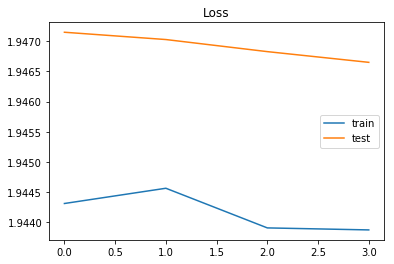

In [59]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();


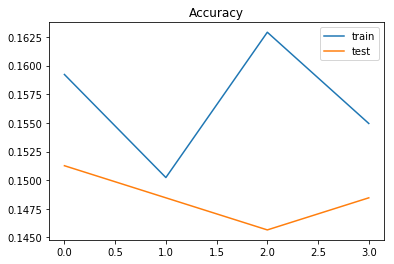

In [60]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [61]:
## Test with a new sentence.

new_sentence = ['I m so  that you agreed to go see anabelle with me tomorrow']
seq = tokenizer.texts_to_sequences(new_sentence)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['sad','anger','fear','surprise','disgust','joy']
print(pred, labels[np.argmax(pred)])

[[0.14296925 0.1425682  0.13836837 0.13773495 0.15035984 0.14602232
  0.14197716]] disgust


In [62]:
## Test with a new sentence.

new_sentence = ['Isnt it kinda  that nobody cares when you are missing anymore']
seq = tokenizer.texts_to_sequences(new_sentence)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['surprise','anger','fear','sad','disgust','joy']
print(pred, labels[np.argmax(pred)])

[[0.14305411 0.14079764 0.14116746 0.13846938 0.14506121 0.1460358
  0.14541437]] joy


In [63]:
new_sentence = ['Nah Im being dead serious my fan been acting funny lately and Im  because its right over my bed']
seq = tokenizer.texts_to_sequences(new_sentence)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['surprise','anger','fear','sad','disgust','joy']
print(pred, labels[np.argmax(pred)])

[[0.13959368 0.1415586  0.1429557  0.14496855 0.14544107 0.14220461
  0.14327775]] disgust
